## Plans

## 0 Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from myImageLib import wowcolor
import numpy as np
import os
from corrLib import readdata
from corr_utils import *
from scipy.signal import savgol_filter
import typesetting.main as tm
from IPython.display import clear_output
tm.prl('1-column-2-panel')
dirs = data_log_mapping(kw='aug')

## Figure 1: experimental setup and images

## Figure 2: spatial correlation functions and correlation lengths

- (a) velocity correlation
- (b) concentration correlation
- (c) correlation length
- (d) ratio between two correlation lengths

### (a) Velocity correlation

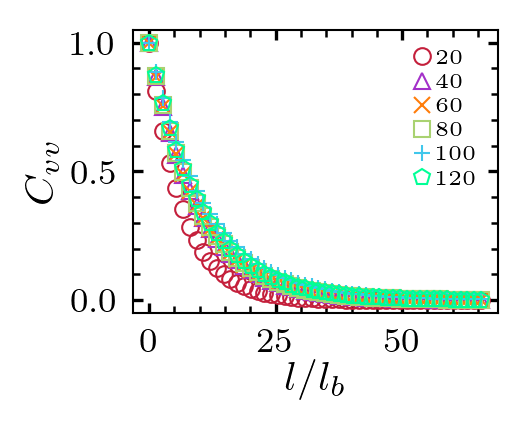

In [3]:
data = pd.read_csv(r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr\spatialCorrV-1.csv')
data.R = data.R - data.R.min()
ax, cl_data = plot_correlation(data, xlim=600, plot_cols=['R', 'C'])
ax.set_xlabel('$l/l_b$')
ax.set_ylabel('$C_{vv}$')
ax.legend(fontsize=5) 

### (b) Concentration correlation

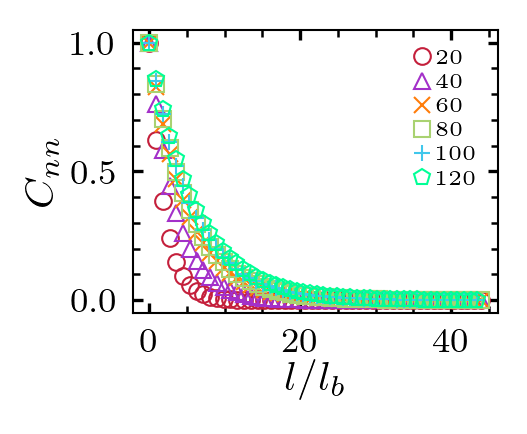

In [4]:
data = pd.read_csv(r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr\spatialCorr-1.csv')
ax, cl_data = plot_correlation(data, xlim=400)
ax.set_xlabel('$l/l_b$')
ax.set_ylabel('$C_{nn}$')
ax.legend(fontsize=5) 

### (c) Correlation lengths

In [6]:
# velocity correlation
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrV')
data = data.dropna()
# concentration correlation
data1 = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrI')
data1 = data1.dropna()

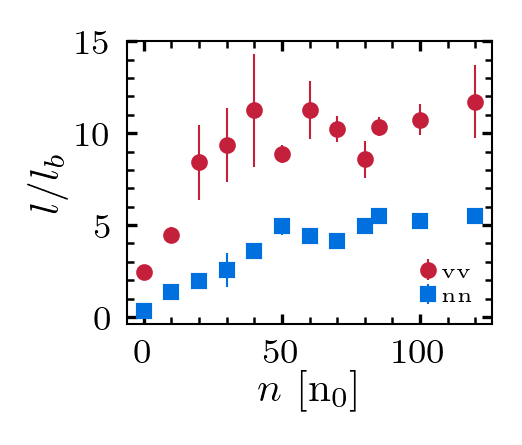

In [7]:
plt.figure(dpi=300)
plt.errorbar(data['conc'], data['avg']*0.33/3, yerr=data['std']*0.33/3, 
             ls='', elinewidth=0.5, marker='o', label='vv', markersize=3, color=wowcolor(0))
plt.errorbar(data1['conc'], data1['avg']*0.33/3, yerr=data1['std']*0.33/3, 
             ls='', elinewidth=0.5, marker='s', label='nn', markersize=3, color=wowcolor(8))
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('$l/l_b$')
plt.legend(loc='lower right', fontsize=5)

### (d) Ratio between two correlation lengths

In [9]:
# velocity correlation
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrV')
data = data.dropna()
# concentration correlation
data1 = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrI')
data1 = data1.dropna()
lv = np.array(data['avg'])
ln = np.array(data1['avg'])

Text(0, 0.5, '$l_{vv}/l_{nn}$')

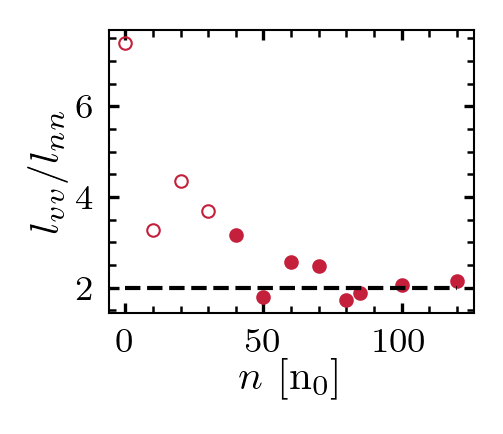

In [10]:
plt.figure(dpi=300)
plt.plot(data['conc'][0:4], (lv/ln)[0:4], marker='o', ls='', mfc=(0,0,0,0),
        mew=0.5, mec=wowcolor(0), markersize=3)
plt.plot(data['conc'][4:], (lv/ln)[4:], marker='o', ls='', mfc=wowcolor(0),
        mew=0.5, mec=wowcolor(0), markersize=3)
plt.plot([0, 120], [2, 2], ls='--', color='black', lw=1)
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('$l_{vv}/l_{nn}$')

### Miscellaneous

In [15]:
# summarize data
# sample 10 frames out of the last 1/3 of frames
corr_data_path = r'E:\moreData\08052020\cav_imseq'
num_sample = 20 # number of frames to sample
sample_clA = []
sample_clV = []
sfL = next(os.walk(corr_data_path))[1]
sfL_new = []
for s in sfL:
#     print('sample ' + str(n))
    corr_data_path_num = os.path.join(corr_data_path, s)
    
    # sample 20 frames in the last 1/3 frames
    
    l = len(corrLib.readdata(corr_data_path_num))
    if l > 60:
        samples = np.random.randint((l*2/3)/2, (l-1)/2, num_sample) * 2
        clAL = []
        clVL = []
        for i in samples:
            data_raw = pd.read_csv(os.path.join(corr_data_path_num, '{0:04d}-{1:04d}.csv'.format(i, i+1))) # X Y CA CV
            data_AV = xy_to_r(data_raw).sort_values(by=['R'])     
            clA, fit = corr_length(data_AV.rename(columns={'CA': 'C'}), fitting_range=500)
            clV, fit = corr_length(data_AV.rename(columns={'CV': 'C'}), fitting_range=500)
            clAL.append(clA)
            clVL.append(clV)
        sample_clA.append(np.array(clAL).mean())
        sample_clV.append(np.array(clVL).mean())
        sfL_new.append(int(s))
    else:
        raise ValueError('Too few data to sample from. Need at least 60 .csv files.')
summary = pd.DataFrame({'sample': sfL_new, 'clA': sample_clA, 'clV': sample_clV})
summary.to_csv(os.path.join(corr_data_path, 'summary.csv'), index=False)
### Needs further improvement

In [36]:
# retrieve data from cav_imseq/summary.csv
folder = r'E:\moreData'
subfolder_name = 'cav_imseq'
data = {'conc': [], 'clA_avg': [], 'clV_avg': [], 'clA_std': [], 'clV_std': []}
for kw in dirs:
    if kw != '00':
        conc = int(kw)
        for n, dn in enumerate(dirs[kw]):
            date, num = dn.split('-')
            summary_dir = os.path.join(folder, date, subfolder_name, 'summary.csv')
            temp = pd.read_csv(summary_dir, index_col='sample').loc[[int(num)]]
            if n == 0:
                conc_data = temp
            else:
                conc_data = conc_data.append(temp)
        data['conc'].append(conc)
        data['clA_avg'].append(conc_data.clA.mean())
        data['clV_avg'].append(conc_data.clV.mean())
        data['clA_std'].append(conc_data.clA.std())
        data['clV_std'].append(conc_data.clV.std())

## Figure 3: concentration dependence of $\alpha$

- (a) standard deviation at various subsystem sizes
- (b) concentration dependence of $\alpha$
- (c) concentration dependence of energy $E$

### (a) standard deviation at various subsystem sizes

In [11]:
date = []
num = []
conc = []
for kw in dirs:
    if int(kw) <= 120:
        conc.append(int(kw))
        d, n = dirs[kw][1].split('-')
        date.append(d)
        num.append(int(n))
data_log = pd.DataFrame().assign(conc=conc, date=date, num=num).sort_values(by='conc')
# NOTE: 
# This block is not elegant. I want to use a consistent method to load experiment log information and map them to data.
# Throughout this project, I have implemented no less than three of such methods. Yet, none of them are intuitive or easy to use.
# Keep this block here for now, change it in the future.

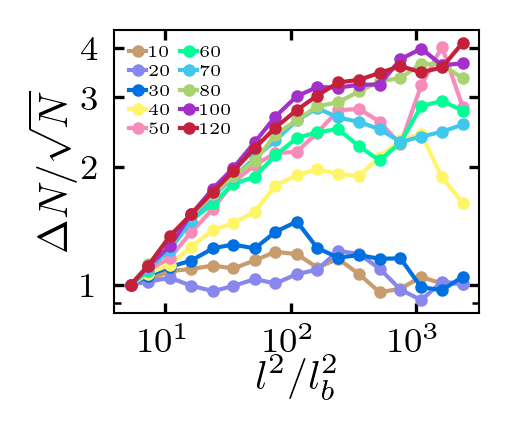

In [19]:
lb = 10
fig, ax = plt.subplots(dpi=300)
data_dir = r'D:\density_fluctuations\{0}\df2_kinetics\{1:02d}\kinetics_data.csv'
for num, i in data_log.iterrows():
    if i.conc != 0 and i.conc != 85:        
        k_data = pd.read_csv(data_dir.format(i.date, i.num))
        gnf_data = k_data.loc[k_data.segment==k_data.segment.max()]
        x, y = postprocess_gnf(gnf_data, lb, xlim=[5, 10000], sparse=2)
        ax.plot(x, y, marker='o', label=str(i.conc), color=wowcolor(num), markersize=2, lw=1)
ax.loglog()
ax.legend(loc='upper left', ncol=2, fontsize=4)
ax.set_xlabel('$l^2/l_b^2$')
ax.set_ylabel(' $\Delta N/\sqrt N$')
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['1', '2', '3', '4'])
ax.set_xticks([10, 100, 1000])

### (b) concentration dependence of $\alpha$

Text(0, 0.5, '$\\alpha$')

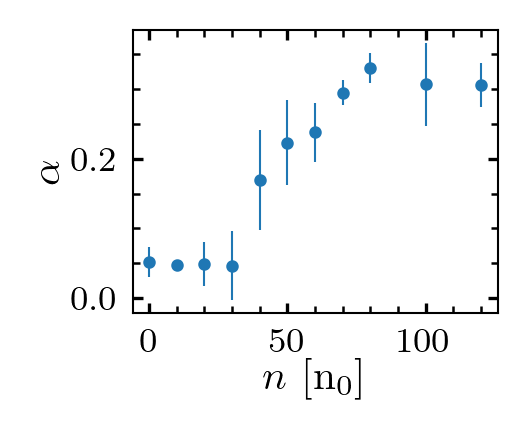

In [5]:
# load data and plot
fig, ax = plt.subplots(dpi=300)
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='df2')
# data = data.dropna()
ax.errorbar(data['conc'], data['avg'], yerr=data['std'], ls='', elinewidth=0.5, marker='o', markersize=2)
ax.set_xlabel('$n$ [n$_0$]')
ax.set_ylabel('$\\alpha$')

### (c) concentration dependence of energy $E$

Text(0, 0.5, '$E$ [px$^2$/s$^2$]')

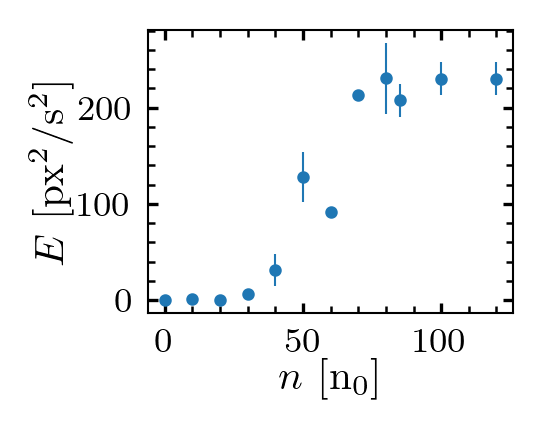

In [21]:
# load data and plot
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='energy_order')
# data = data.dropna()
plt.figure(dpi=300)
plt.errorbar(data['conc'], data['energy_avg'], yerr=data['energy_std'], ls='', elinewidth=0.5, marker='o', markersize=2)
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('$E$ [px$^2$/s$^2$]')

### Miscellaneous

In [1]:
# Summarize data from each raw data folders
dates = ['08032020', '08042020', '08052020', '08062020']
sampling_range = 1 # range between 0 and 1, above which we sample the alpha values and average

for date in dates:
    date_folder = r'D:\density_fluctuations\{}'.format(date)
    k_master_folder = os.path.join(date_folder, 'df2_kinetics')
    i_master_folder = os.path.join(date_folder, 'overall_intensity')
    sfL = next(os.walk(k_master_folder))[1]
    alpha_list = []
    n_list = []
    for sf in sfL:
        n = int(sf)
        fps = data_log()[date]['fps'][n]
        k_folder = r'D:\density_fluctuations\{0}\df2_kinetics\{1:02d}'.format(date, n)
        i_folder = r'D:\density_fluctuations\{0}\overall_intensity\{1:02d}'.format(date, n)
        k_data = pd.read_csv(os.path.join(k_folder, 'kinetics_data.csv'))
        i_data = pd.read_csv(os.path.join(i_folder, 'intensity.csv'))
        data = plot_kinetics(k_data, i_data, tlim=None, xlim=[5, 100], lb=10, mpp=0.33, seg_length=50, fps=fps, plot=False)
        df = pd.DataFrame().assign(t=data['t0'], alpha=data['alpha'])
        alpha = df['alpha'].loc[df['t']>=df['t'].max()*sampling_range].mean()
        n_list.append(n)
        alpha_list.append(alpha)
    data = pd.DataFrame({'n': n_list, 'alpha': alpha_list})
    data.to_csv(os.path.join(k_master_folder, 'summary.csv'), index=False)

## Figure 4: evolution

- (a) standard deviation during the onset of active turbulence
- (b) temporal evolution of $\alpha$, $E$ and $OP$

### Evolution plots gallery

|concentration|sample 1|sample 2|sample 3|
|:---------:|:---------:|:---------:|:---------:|
|85|![](temp_data\kinetics_eo\85-1.png)|![](temp_data\kinetics_eo\85-2.png)|![](temp_data\kinetics_eo\85-3.png)|
|80|![](temp_data\kinetics_eo\80-1.png)|![](temp_data\kinetics_eo\80-2.png)|![](temp_data\kinetics_eo\80-3.png)|
|70|![](temp_data\kinetics_eo\70-1.png)|![](temp_data\kinetics_eo\70-2.png)|![](temp_data\kinetics_eo\70-3.png)|
|60|![](temp_data\kinetics_eo\60-1.png)|![](temp_data\kinetics_eo\60-2.png)|![](temp_data\kinetics_eo\60-3.png)|
|50|![](temp_data\kinetics_eo\50-1.png)|![](temp_data\kinetics_eo\50-2.png)|![](temp_data\kinetics_eo\50-3.png)|
|40|![](temp_data\kinetics_eo\40-1.png)|![](temp_data\kinetics_eo\40-2.png)|![](temp_data\kinetics_eo\40-3.png)|
|30|![](temp_data\kinetics_eo\30-1.png)|![](temp_data\kinetics_eo\30-2.png)|![](temp_data\kinetics_eo\30-3.png)|
|20|![](temp_data\kinetics_eo\20-1.png)|![](temp_data\kinetics_eo\20-2.png)|![](temp_data\kinetics_eo\20-3.png)|
|10|![](temp_data\kinetics_eo\10-1.png)|![](temp_data\kinetics_eo\10-2.png)|![](temp_data\kinetics_eo\10-3.png)|
|0|![](temp_data\kinetics_eo\0-1.png)|![](temp_data\kinetics_eo\0-2.png)|![](temp_data\kinetics_eo\0-3.png)|

### (a) standard deviation during the onset of active turbulence

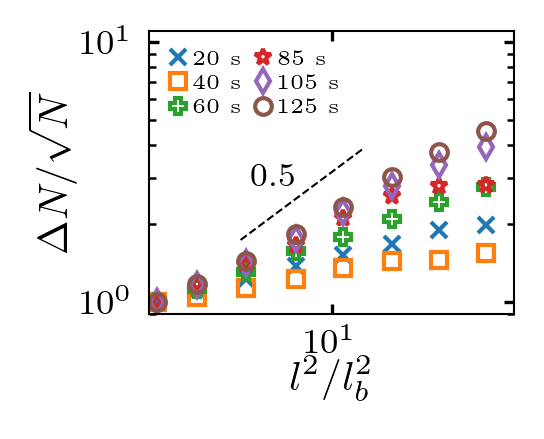

In [6]:
seg_length = 50
k_data = pd.read_csv(r'D:\density_fluctuations\06232020\df2_kinetics_norm\01\kinetics_data.csv'.format(seg_length))
plot_data, fig, ax = plot_std(k_data, seg_length, tlim=[20, 150], xlim=[1, 100], lb=10, mpp=0.33, fps=10, num_curves=6)
# guide of the eye slope
x = np.array([3, 15])
y = x**0.5 * 1
ax.plot(x, y, lw=0.5, ls='--', color='black')
ax.text(0.6*x[0]+0.11*x[1], y.mean(), '0.5', {'fontsize': 8})
ax.axis([0.9, 110, 0.9, 11])
ax.legend(ncol=2, fontsize=5, loc='upper left')

### (b) temporal evolution of $\alpha$, $E$ and $OP$

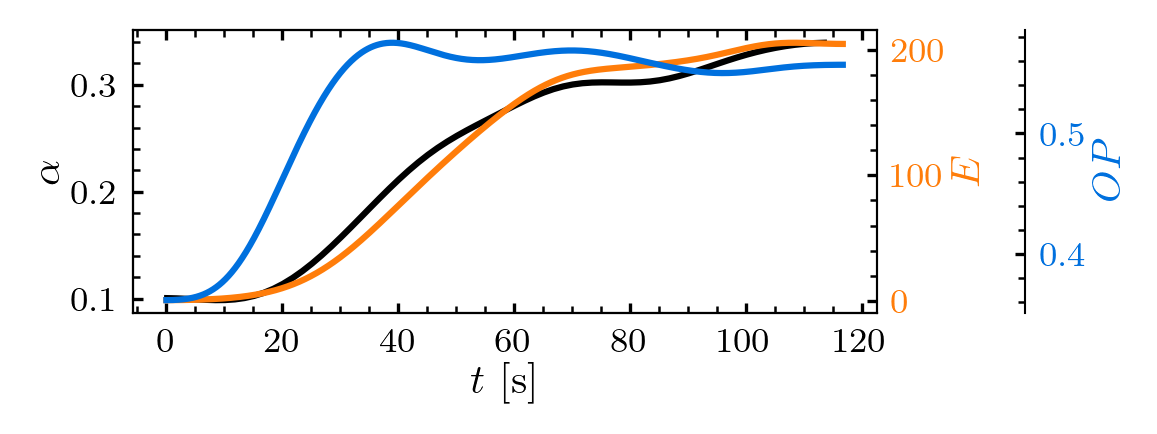

In [2]:
data_path = r'D:\density_fluctuations\08032020'
n = 2
k_data = pd.read_csv(os.path.join(data_path, 'df2_kinetics\{:02d}\kinetics_data.csv'.format(n)))
i_data = pd.read_csv(os.path.join(data_path, 'overall_intensity\{:02d}\intensity.csv'.format(n)))
eo_data = pd.read_csv(os.path.join(data_path, 'energy_order\{:02d}\energy_order.csv'.format(n)))
tm.prl('1-column-1-panel')
data = plot_kinetics_eo(k_data, i_data, eo_data, xlim=100, seg_length=50, fps=30, plot=False)
data = kinetics_eo_from_light_on(data, plot=False)
new_data, fig, ax = kinetics_eo_smooth(data)
# fig.savefig(os.path.join(data_path, 'df2_kinetics\{:02d}.png'.format(n)))

## Figure 5: local correlations between concentration fluctuations and flow energy 
- Inset: show two fields with high correlation at an instance

In [5]:
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='flow_conc_corr')

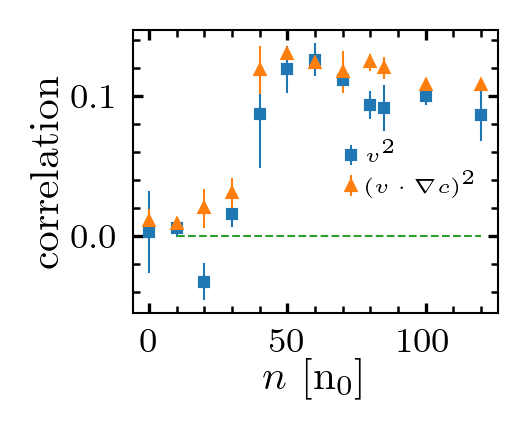

In [8]:
tm.prl('1-column-2-panel')
plt.figure(dpi=300)
markers = {'energy': 's', 'convection': '^'}
labels = {}
labels['convection'] = r'$(v\cdot\nabla c)^2$'
labels['energy'] = r'$v^2$'

for kw in markers:
    plt.errorbar(data['conc'], data[kw], yerr=data[kw+'_err'], label=labels[kw],
                ls='', marker=markers[kw], markersize=2, mew=1, lw=0.5)
    

plt.legend(loc='right', fontsize=5)
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('correlation')
plt.plot([10, 120], [0, 0], ls='--', lw=0.5)

### 5.2 Why do I only consider the correlation between concentration fluctuation and advection magnitude?

Concentration fluctuation is defined by standard deviation, and is used for quantifying the magnitude of concentration change at a place within certain amount of time. So, it is always a positive value and has no direction. In contrast, fluid flows always have directions, including the advection: when flow velocity and concentration gradient are in the same direction(\*), the advection is positive, and particles are advected uphill to a higher concentration region; when flow velocity and concentration gradient are in opposite directions, the advection is negative, and particles are advected downhill to a lower concentration region. 

Both positive and negative advections cause local concentrations to change. We have already seen in the data, that local concentration fluctuation correlates with the magnitude of local advection very well. What if we consider not only the magnitude of the advection, but also the direction? The picture below shows the two scenario - considering or not considering direction of advcetion - and their corresponding correlation. The first row shows the local concentration fluctuation field, advection magnitude and their correlation. The second row shows the local concentration correlation, advection with direction and their correlation. Clearly, advection magnitude shows better correlation. Directly eye inspection also suggests a good consistency between local concentration fluctuation and advection magnitude.

\*: the direction of concentration gradient is defined as the ascending direction

<img src="temp_data\why_magnitude.png" width="500">

### 5.3 Why do bacteria generate such flows?

Though our analysis reveals that the advection drives the concentration fluctuations, we still have a question: why do bacteria generate such flows, which goes uphill in concentration, in the same direction with concentration gradient? In other words, given a concentration field, can we predict the flow field?

We are seeking the evolution rules of concentration. Now, it gets clear that concentration field at one moment gives rise to the concentration field in the next moment by generating flows. A changed concentration field leads to a changed flow field, which, changes the concentration field for sure, but in a different way. 

### 5.4 Why do I only consider $v\cdot\nabla c$, not other quantities?

### 5.5 Revisit $\nabla\cdot(cv)$

In [124]:
piv_folder = r'D:\density_fluctuations\08032020\piv_imseq\02'
small_folder = r'D:\density_fluctuations\08032020\small_imseq\02'
concgrad_folder = r'D:\density_fluctuations\08032020\concgrad_velocity\02'
conv_folder = r'D:\density_fluctuations\08032020\flow_derivs\02\convection'
n = 1200
pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(n, n+1)))
x = pivData.x.drop_duplicates()
col = len(x)
y = pivData.y.drop_duplicates()
row = len(y)
U = np.reshape(np.array(pivData.u), (row, col))
V = np.reshape(np.array(pivData.v), (row, col))
seq = np.load(os.path.join(small_folder, 'stack.npy'))
df = seq[n: n+10].std(axis=0)
concgrad = np.load(os.path.join(concgrad_folder, 'corr_evolution.npy'))
conv = np.load(os.path.join(conv_folder, '{0:04d}-{1:04d}.npy'.format(n, n+1)))
vel_corr = corr2d(V**2+U**2, df)
conv_corr = corr2d(abs(conv), df)
divcn_corr = corr2d(abs(divcn(pivData, seq[n], 50)), df)
print('correlation with velocity magnitude: {:.3f}'.format(vel_corr))
print('correlation with convection magnitude: {:.3f}'.format(conv_corr))
print('correlation with divcn magnitude: {:.3f}'.format(divcn_corr))

correlation with velocity magnitude: 0.062
correlation with convection magnitude: 0.041
correlation with divcn magnitude: -0.029


In [159]:
std_list = []
t = range(0, 3500, 100)
for i in t:
    s = seq[i].std()
    std_list.append(s)
    print(str(i) + ': ' + str(s))

0: 0.4353787227613727
100: 1.7205535399896774
200: 1.720162287275621
300: 1.7319364824732657
400: 1.7112099084628516
500: 1.6459444923441553
600: 1.5092067395589386
700: 1.3990018875393897
800: 1.4970559579103164
900: 1.5304525207854802
1000: 1.3816887663821114
1100: 1.4351484775300074
1200: 1.4699996358629253
1300: 1.6040369650186805
1400: 1.742314275664463
1500: 1.9003520122908846
1600: 2.1127258701174094
1700: 1.9212519843306162
1800: 2.0956500569520733
1900: 2.0939963732327844
2000: 2.4104844907640883
2100: 2.3379109919298338
2200: 2.133351426489907
2300: 2.5758891314304386
2400: 2.4925560905355177
2500: 2.3732856466059253
2600: 2.4538470315921312
2700: 2.5671643059930203
2800: 2.4010109946516405
2900: 2.160272472252791
3000: 2.578269219845155
3100: 2.3648004340074595
3200: 2.649957177888858
3300: 2.614443849505147
3400: 2.5427650355820277


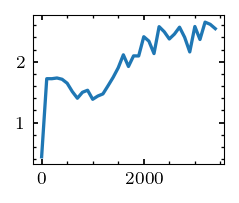

In [160]:
plt.plot(t, std_list)

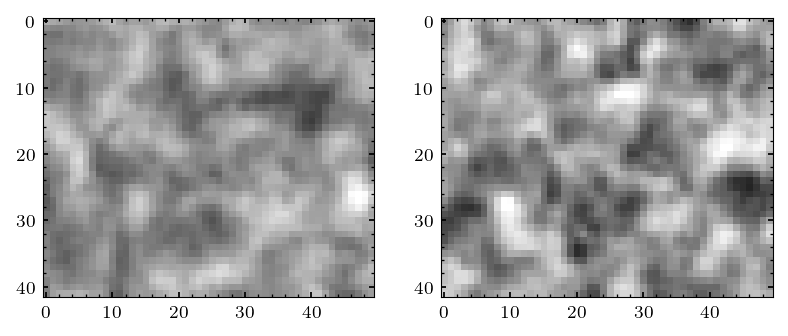

In [171]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 3))
ax[0].imshow(seq[100],cmap='gray', vmin=142, vmax=157)
ax[1].imshow(seq[2500], cmap='gray', vmin=142, vmax=157)

In [169]:
seq[500].min()

145.4608

In [150]:
X = np.reshape(np.array(pivData.x), (row, col))
Y = np.reshape(np.array(pivData.y), (row, col))
XI, YI, CI = corrLib.corrI(X, Y, seq[96])

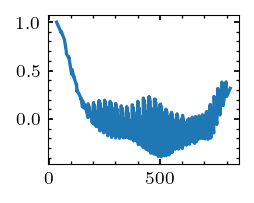

In [151]:
r_corr = corrLib.distance_corr(XI, YI, CI)
plt.plot(r_corr.R, r_corr.C)

In [152]:
corr_length(r_corr, fitting_range=None)

(80.55553217792038, (array([0.0124138]), array([[8.47114307e-07]])))

In [93]:
seq1 = np.load(r'D:\density_fluctuations\08032020\small_imseq\14\stack.npy')

In [94]:
seq1[50].std()

0.024422358657479288

In [71]:
def divcn(pivData, img, winsize, step=None, shape=None):
    """
    Compute the div(cn) term from PIV and image.
    
    Args:
    pivData -- (X, Y, U, V)
    img -- 2d matrix
    winsize -- window size of PIV, used to scale down image
    step -- step of PIV, used to scale down image
    
    Returns:
    div_cn -- 2d matrix
    """
    
    x = pivData.sort_values(by=['x']).x.drop_duplicates()
    if step == None:
        # Need to infer the step size from pivData
        step = x.iat[1] - x.iat[0]
    
    if shape == None:
        # Need to infer shape from pivData
        y = pivData.y.drop_duplicates()
        shape = (len(y), len(x))
        
#     X, Y, I = corrLib.divide_windows(img, windowsize=[winsize, winsize], step=step)
    c = 186 + 1000* img
    
    assert(img.shape == shape)
    X = np.array(pivData.x).reshape(shape)
    Y = np.array(pivData.y).reshape(shape)
    U = np.array(pivData.u).reshape(shape)
    V = np.array(pivData.v).reshape(shape)
    
    cu = c * U
    cv = c * V
    
    dudx = np.gradient(cu, step, axis=1)
    dvdy = np.gradient(cv, step, axis=0)
    div_cn = dudx + dvdy
    
    return div_cn

## 6. Dimensionality effect

Probe dimensionality effect by gradually changing the chamber thickness (200, 140, 100, <del>20</del>)

In [29]:
data = pd.read_excel(r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='dimensionality')
data = data.drop([1])

Text(0, 0.5, '$\\alpha$')

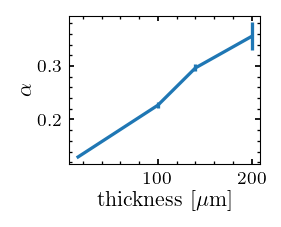

In [31]:
plt.errorbar(data['thickness'], data['alpha_avg'], yerr=data['alpha_std'])
plt.xlabel('thickness [$\mu$m]')
plt.ylabel('$\\alpha$')

Text(0, 0.5, '$E$ [px$^2$/s$^2$]')

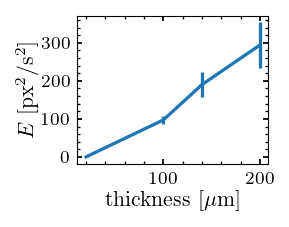

In [34]:
data = pd.read_excel(r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='dimensionality')
plt.errorbar(data['thickness'], data['energy_avg'], yerr=data['energy_std'])
plt.xlabel('thickness [$\mu$m]')
plt.ylabel('$E$ [px$^2$/s$^2$]')

**<font color='red'>Question:</font>** when reducing chamber thickness, the density fluctuation scaling exponent does decrease. However, the flow energy decreases at the mean time. This observation has posed a question: does thickness influence the overall motility of bacteria, or just suppress interaction between bacteria by approaching two dimensional settings? 

## 7 What exactly is the relationship between flow energy and global fluctuations?

This relationship has been suggested by other observations with strong enough evidence. Can we take a step forward, to ask what is the quantitative dependence? Though this dependence has been seen in many different conditions, such as different gap sizes and different concentrations, the quantitative dependece can be also different under these conditions. Thus, if I plot $\alpha$ as a function of $E$, data points obtained from the same condition set may show similar trend and relation, but data from different conditions may deviate. This potential scenerio, while posing difficulty in drawing simple conclusion, can allow us to understand it better.

### 7.1 How many data points do I have?

Each video gives me approximately 3000 frames - corresponding to 1500 velocity field data. However, the $\alpha$ data is much fewer, 3000 frames should only give 60 points. The 50 videos should in total provide 50*60=3000 data points. Let's get started with the first video: 08032020/00 

In [4]:
############
folder = r'E:\moreData\08032020'
n = 0
############
eo_folder = os.path.join(folder, 'energy_order\{:02d}'.format(n))
df_folder = os.path.join(folder, 'df2_kinetics\{:02d}'.format(n))
i_folder = os.path.join(folder, 'overall_intensity\{:02d}'.format(n))
eo_data = pd.read_csv(os.path.join(eo_folder, 'energy_order.csv'))
k_data = pd.read_csv(os.path.join(df_folder, 'kinetics_data.csv'))
i_data = pd.read_csv(os.path.join(i_folder, 'intensity.csv'))

In [179]:
eo_data.head()

,t,E,OP
0,0.000000,10.609475,0.914286
1,0.066667,144.280322,0.914286
2,0.133333,36.276432,0.914286
3,0.200000,157.834008,0.867143
4,0.266667,4.591124,0.914286


In [177]:
df_data.head()

,n,d,segment
0,25.0,0.008590,1
1,36.0,0.010647,1
2,49.0,0.012305,1
3,64.0,0.014242,1
4,81.0,0.016658,1


In [67]:
i_data.head()

,t,intensity
0,0,12.000614
1,1,12.000672
2,2,12.000644
3,3,12.000649
4,4,12.000641


### 7.2 A function that extract and rearrange the data

Into two 2 columns: ('energy', 'alpha')

In [3]:
def rearrange_energy_alpha(k_data, i_data, eo_data, xlim=[1, 100], seg_length=50, fps=30):
    """
    Extract and rearrange energy and alpha data.
    
    Args:
    k_data -- kinetics data, read from df2_kinetics folder
    i_data -- image intensity data, read from overall_intensity folder
    eo_data -- energy and order parameter data, read from energy_order folder
    xlim -- range of x for alpha fitting (determined roughly by correlation length)
    seg_length -- segment length for analyzing temporal fluctuations
    fps -- frame per second of video
    
    Returns:
    ea_data -- energy and alpha data, as a DataFrame
    """
    
    data = plot_kinetics_eo(k_data, i_data, eo_data, tlim=None, xlim=xlim, lb=10, mpp=0.33, seg_length=seg_length, fps=fps, plot=False)
    new_data = kinetics_eo_from_light_on(data, plot=False)
    
    E_list = []
    for t in new_data['t0']:
        E = new_data['E'][abs(new_data['t2'] - t).argmin()]
        E_list.append(E)

    ea_data = pd.DataFrame().assign(energy=E_list, alpha=new_data['alpha'])
    
    return ea_data

In [37]:
ea_data = rearrange_energy_alpha(k_data, i_data, eo_data)
ea_data.head()

,energy,alpha
0,0.478633,0.080045
1,0.559931,0.098804
2,0.496495,0.107986
3,0.417108,0.070891
4,0.442863,0.096820


### 7.3 Combine data from all concentrations

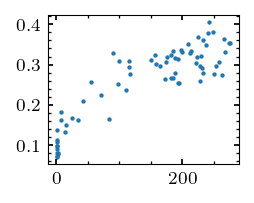

In [38]:
# 1 video test
plt.scatter(ea_data['energy'], ea_data['alpha'], s=1)

In [39]:
dirs

{'120': ['08062020-3', '08062020-4', '08062020-5'],
 '100': ['08062020-0', '08062020-1', '08062020-2'],
 '85': ['08052020-3', '08052020-4', '08052020-5'],
 '80': ['08032020-0', '08032020-1', '08032020-2'],
 '70': ['08042020-0', '08042020-1', '08042020-2'],
 '60': ['08032020-3', '08032020-4', '08032020-5'],
 '50': ['08042020-3', '08042020-4', '08042020-5'],
 '40': ['08032020-6', '08032020-7', '08032020-8'],
 '30': ['08042020-6', '08042020-7', '08042020-8'],
 '20': ['08032020-9', '08032020-10', '08032020-11'],
 '10': ['08042020-9', '08042020-10', '08042020-11'],
 '00': ['08032020-12', '08032020-13', '08032020-14']}

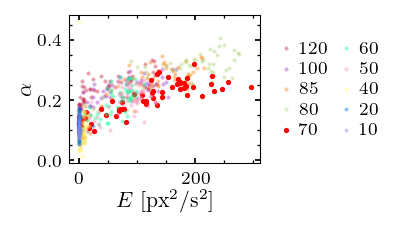

In [5]:
count = 0
for kw in dirs:
    if kw != '00' and kw != '30':
        d = dirs[kw][0]
        date, num = d.split('-')
        ############
        folder = r'D:\density_fluctuations\{}'.format(date)
        n = int(num)
        ############
        eo_folder = os.path.join(folder, 'energy_order\{:02d}'.format(n))
        df_folder = os.path.join(folder, 'df2_kinetics\{:02d}'.format(n))
        i_folder = os.path.join(folder, 'overall_intensity\{:02d}'.format(n))
        eo_data = pd.read_csv(os.path.join(eo_folder, 'energy_order.csv'))
        k_data = pd.read_csv(os.path.join(df_folder, 'kinetics_data.csv'))
        i_data = pd.read_csv(os.path.join(i_folder, 'intensity.csv'))
        ea_data = rearrange_energy_alpha(k_data, i_data, eo_data)
        if kw == '70':
            plt.scatter(ea_data['energy'], ea_data['alpha'], s=2, color='red', 
                        label=kw)
        else:
            plt.scatter(ea_data['energy'], ea_data['alpha'], s=1, color=wowcolor(count), 
                        label=kw, alpha=0.3)
        count += 1
plt.xlabel('$E$ [px$^2$/s$^2$]')
plt.ylabel('$\\alpha$')
plt.legend(loc='right', bbox_to_anchor=(1.7, 0.5), ncol=2)
# plt.loglog()
# plt.axis([0.01, 500, 0.02, 0.4])

(0.01, 500.0, 0.02, 0.4)

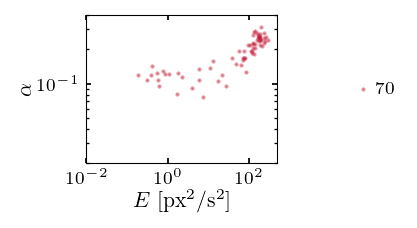

In [88]:
count = 0
for kw in dirs:
    if kw == '70':
        d = dirs[kw][0]
        date, num = d.split('-')
        ############
        folder = r'E:\moreData\{}'.format(date)
        n = int(num)
        ############
        eo_folder = os.path.join(folder, 'energy_order\{:02d}'.format(n))
        df_folder = os.path.join(folder, 'df2_kinetics\{:02d}'.format(n))
        i_folder = os.path.join(folder, 'overall_intensity\{:02d}'.format(n))
        eo_data = pd.read_csv(os.path.join(eo_folder, 'energy_order.csv'))
        k_data = pd.read_csv(os.path.join(df_folder, 'kinetics_data.csv'))
        i_data = pd.read_csv(os.path.join(i_folder, 'intensity.csv'))
        ea_data = rearrange_energy_alpha(k_data, i_data, eo_data)
        plt.scatter(ea_data['energy'], ea_data['alpha'], s=1, color=wowcolor(count), label=kw,
                   alpha=0.4)
        count += 1
plt.xlabel('$E$ [px$^2$/s$^2$]')
plt.ylabel('$\\alpha$')
plt.legend(loc='right', bbox_to_anchor=(1.7, 0.5), ncol=2)
plt.loglog()
plt.axis([0.01, 500, 0.02, 0.4])

## 8 Directions of velocity and concentration gradients